In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re
import numpy as np
from matplotlib.lines import Line2D
import pickle
from collections import deque

In [14]:
import matplotlib
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.linewidth'] = 1

In [15]:
def avg_smooth(arr, width=5):
    padded_arr = np.concatenate([np.ones(shape=(width - 1,)) * arr[0], arr])
    return np.convolve(padded_arr, np.ones(shape=(width,)) * (1 / width), mode='valid')

In [16]:
def gaussian_smooth(arr, width=5, sigma=3):
    if width % 2 == 0:
        width += 1
    padded_arr = np.concatenate([np.ones(shape=(width - 1,)) * arr[0], arr])
    kernel = np.exp(-0.5 * ((np.linspace(-width // 2, width // 2, width) / sigma) ** 2))
    kernel /= np.sum(kernel)
    return np.convolve(padded_arr, kernel, mode='valid')

In [17]:
def find_end(arr, window_size=10):
    for i in range(arr.shape[0] - window_size + 1):
        if np.all(arr[i:i + window_size] == arr[i]):
            return i + 1
    else:
        return arr.shape[0]

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.weight"] = '700'

* [Memtier](#Memtier)
* [Shift Zipfian](#Shift-Zipfian)
* [Redis](#Redis)
* [Memcached](#Memcached)
* [MySQL](#MySQL)
* [XGBoost](#XGBoost)
* [Streaming](#Streaming)
* [CloudSuite](#CloudSuite)

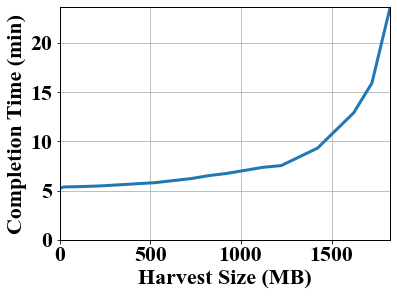

In [10]:
plt.rcParams.update({'font.size': 22})

max_rss = 2022.6
mem_size = np.array([2022.6, 2000, 1900, 1800, 1500, 1300, 1200, 1100, 900, 800, 600, 400, 300, 200])
completion_time = np.array([312.75, 322.17, 324.32, 328.29, 347.81, 372.7, 391.07, 404.6, 441.9, 452.29, 558.54, 774.51, 954.52, 1413])

plt.figure(figsize=(5.4, 4), constrained_layout=True)
plt.plot((max_rss - mem_size), completion_time / 60, linewidth=3)
plt.xlim(0, np.max(max_rss - mem_size))
plt.xlabel("Harvest Size (MB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Completion Time (min)", fontweight="bold", fontname="Times New Roman")
plt.grid()
plt.ylim(0, 1420 / 60)

# plt.tight_layout()
plt.savefig("curve-tensorflow.pdf", format="pdf")

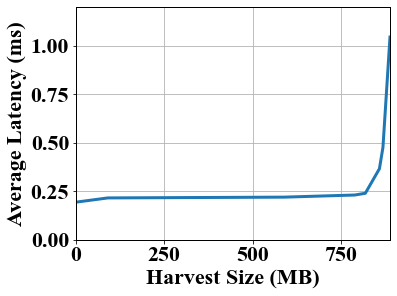

In [11]:
plt.rcParams.update({'font.size': 22})

max_rss = 989.8
mem_size = np.array([989.8, 900, 400, 200, 170, 130, 120, 100])
completion_time = np.array([194.02, 215.67, 219.73, 230.63, 239.53, 365.89, 475.85, 1044.16])

plt.figure(figsize=(5.4, 4), constrained_layout=True)
plt.plot(max_rss - mem_size, completion_time / 1000, linewidth=3)
plt.xlim(0, np.max(max_rss - mem_size))
plt.xlabel("Harvest Size (MB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Average Latency (ms)", fontweight="bold", fontname="Times New Roman")
plt.grid()
plt.ylim(0, 1200 / 1000)

# plt.tight_layout()
plt.savefig("curve-memcachier.pdf", format="pdf")

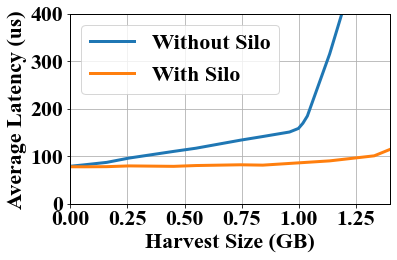

In [8]:
plt.rcParams.update({'font.size': 22})

max_rss = 5262.9
with_silo_mem_size = np.array([
    5300,
    5200,
    5100,
    5000,
    4800,
    4700,
    4500,
    4400,
    4100,
    3900,
    3850,
    3800,
    3790,
    3760,
    3740,
    3700,
    3600,
    3500
])
with_silo_latency = np.array([
    77.99627325,
    77.89236675,
    78.19459749,
    79.77820548,
    78.83743411,
    80.54552051,
    82.13286118,
    81.38475024,
    90.36826844,
    101.013771,
    110.555316,
    120.0990198,
    130.4170349,
    152.2953155,
    289.0149701,
    441.7178069,
    602.5912163,
    853.2304811
])
without_silo_mem_size = np.array([
    5300,
    5200,
    5100,
    5000,
    4800,
    4700,
    4500,
    4400,
    4280,
    4240,
    4220,
    4200,
    4100,
    3900,
    3800
])
without_silo_latency = np.array([
    77.28487796,
    82.10501505,
    87.20680791,
    96.28201658,
    110.312553,
    117.0084606,
    133.975165,
    141.6444811,
    151.1488131,
    158.6441217,
    169.619184,
    184.8143479,
    315.4345794,
    625.622521,
    772.1883763
])

plt.figure(figsize=(5.4, 3.5), constrained_layout=True)
plt.plot((max_rss - without_silo_mem_size) / 1024, without_silo_latency, linewidth=3, label="Without Silo")
plt.plot((max_rss - with_silo_mem_size) / 1024, with_silo_latency, linewidth=3, label="With Silo")
plt.xlim(0, 1.4)
plt.xticks([0, 0.25, 0.5, 0.75, 1, 1.25])
plt.xlabel("Harvest Size (GB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Average Latency (us)", fontweight="bold", fontname="Times New Roman")
plt.grid()
plt.ylim(0, 400)
plt.legend()

# plt.tight_layout()
plt.savefig("curve-redis.pdf", format="pdf")

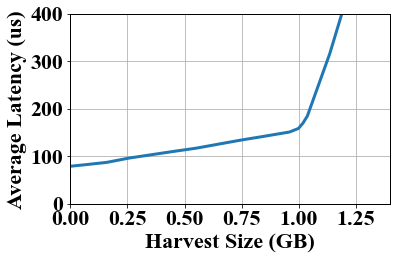

In [9]:
plt.rcParams.update({'font.size': 22})

max_rss = 5262.9
with_silo_mem_size = np.array([
    5300,
    5200,
    5100,
    5000,
    4800,
    4700,
    4500,
    4400,
    4100,
    3900,
    3850,
    3800,
    3790,
    3760,
    3740,
    3700,
    3600,
    3500
])
with_silo_latency = np.array([
    77.99627325,
    77.89236675,
    78.19459749,
    79.77820548,
    78.83743411,
    80.54552051,
    82.13286118,
    81.38475024,
    90.36826844,
    101.013771,
    110.555316,
    120.0990198,
    130.4170349,
    152.2953155,
    289.0149701,
    441.7178069,
    602.5912163,
    853.2304811
])
without_silo_mem_size = np.array([
    5300,
    5200,
    5100,
    5000,
    4800,
    4700,
    4500,
    4400,
    4280,
    4240,
    4220,
    4200,
    4100,
    3900,
    3800
])
without_silo_latency = np.array([
    77.28487796,
    82.10501505,
    87.20680791,
    96.28201658,
    110.312553,
    117.0084606,
    133.975165,
    141.6444811,
    151.1488131,
    158.6441217,
    169.619184,
    184.8143479,
    315.4345794,
    625.622521,
    772.1883763
])

plt.figure(figsize=(5.4, 3.5), constrained_layout=True)
# plt.plot((max_rss - with_silo_mem_size) / 1024, with_silo_latency, linewidth=3, label="With Silo")
plt.plot((max_rss - without_silo_mem_size) / 1024, without_silo_latency, linewidth=3, label="Without Silo")
plt.xlim(0, 1.4)
plt.xticks([0, 0.25, 0.5, 0.75, 1, 1.25])
plt.xlabel("Harvest Size (GB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Average Latency (us)", fontweight="bold", fontname="Times New Roman")
plt.grid()
plt.ylim(0, 400)
# plt.legend()

# plt.tight_layout()
plt.savefig("curve-redis-single.pdf", format="pdf")

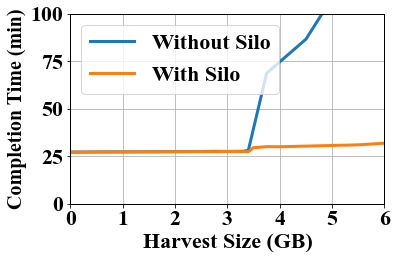

In [11]:
plt.rcParams.update({'font.size': 22})

max_rss = 16.5
with_silo_mem_size = np.array([
    17,
    16,
    15,
    14,
    13.75,
    13.5,
    13.25,
    13.2,
    13.1,
    13,
    12.75,
    12.5,
    12,
    11,
    10,
    9,
    8,
    7
])
with_silo_completion = np.array([
    1625.65,
    1634.11,
    1641.54,
    1645.8,
    1646.39,
    1650.78,
    1647.17,
    1644.94,
    1648.19,
    1772.38,
    1805.19,
    1801.78,
    1821.52,
    1862.08,
    1963.8,
    1973.19,
    2030.88,
    2033.21,
])
without_silo_mem_size = np.array([
    17,
    16,
    15,
    14,
    13.75,
    13.5,
    13.25,
    13.2,
    13.1,
    13,
    12.75,
    12,
    11
])
without_silo_completion = np.array([
    1629.19,
    1637.95,
    1642.55,
    1650.78,
    1656.89,
    1653.55,
    1657.03,
    1657.17,
    1689.7,
    2386.31,
    4123.75,
    5198.03,
    7796.62
])

plt.figure(figsize=(5.4, 3.5), constrained_layout=True)
plt.plot(max_rss - without_silo_mem_size, without_silo_completion / 60, linewidth=3, label="Without Silo")
plt.plot(max_rss - with_silo_mem_size, with_silo_completion / 60, linewidth=3, label="With Silo")
plt.xlim(0, 6)
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.xlabel("Harvest Size (GB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Completion Time (min)", fontweight="bold", fontname="Times New Roman", fontsize=20)
plt.grid()
plt.ylim(0, 100)
plt.legend()

# plt.tight_layout()
plt.savefig("curve-xgboost.pdf", format="pdf")

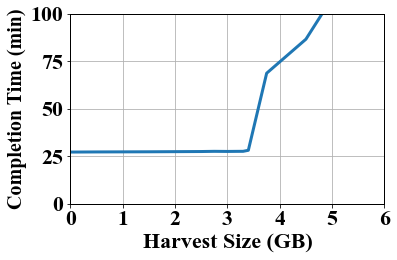

In [12]:
plt.rcParams.update({'font.size': 22})

max_rss = 16.5
with_silo_mem_size = np.array([
    17,
    16,
    15,
    14,
    13.75,
    13.5,
    13.25,
    13.2,
    13.1,
    13,
    12.75,
    12.5,
    12,
    11,
    10,
    9,
    8,
    7
])
with_silo_completion = np.array([
    1625.65,
    1634.11,
    1641.54,
    1645.8,
    1646.39,
    1650.78,
    1647.17,
    1644.94,
    1648.19,
    1772.38,
    1805.19,
    1801.78,
    1821.52,
    1862.08,
    1963.8,
    1973.19,
    2030.88,
    2033.21,
])
without_silo_mem_size = np.array([
    17,
    16,
    15,
    14,
    13.75,
    13.5,
    13.25,
    13.2,
    13.1,
    13,
    12.75,
    12,
    11
])
without_silo_completion = np.array([
    1629.19,
    1637.95,
    1642.55,
    1650.78,
    1656.89,
    1653.55,
    1657.03,
    1657.17,
    1689.7,
    2386.31,
    4123.75,
    5198.03,
    7796.62
])

plt.figure(figsize=(5.4, 3.5), constrained_layout=True)
# plt.plot(max_rss - with_silo_mem_size, with_silo_completion / 60, linewidth=3, label="With Silo")
plt.plot(max_rss - without_silo_mem_size, without_silo_completion / 60, linewidth=3, label="Without Silo")
plt.xlim(0, 5)
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.xlabel("Harvest Size (GB)", fontweight="bold", fontname="Times New Roman")
plt.ylabel("Completion Time (min)", fontweight="bold", fontname="Times New Roman", fontsize=20)
plt.grid()
plt.ylim(0, 100)
# plt.legend()

# plt.tight_layout()
plt.savefig("curve-xgboost-single.pdf", format="pdf")

## Memtier

```yaml
machine:
    type: "m5n.large"
    num_cpu_cores: 2
    memory_size: "8 GB"
workload:
    command: "./memtier_benchmark -t 10 -n 5000000 --ratio 1:1 -c 20 -x 1 --key-pattern R:R --hide-histogram --distinct-client-seed -d 300 --pipeline=1000"
    warm_up: "no"
```

In [ ]:
matplotlib.rcParams['axes.linewidth'] = 2

In [138]:
plt.rcParams.update({'font.size': 25})

##################################
# Load Logging with Control Loop
##################################

with open("../data/memtier_with_silo/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 14), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
recovery_time = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
outlier_prob = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    recovery_time[item_index] = int(item.groups()[3])
    performance[item_index] = float(item.groups()[4])
    promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[7]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[9]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[10]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[11])
    outlier_prob[item_index] = float(item.groups()[12])
    ks_p_value[item_index] = float(item.groups()[13])

time = time / 3600
end_index = 1000
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
recovery_time = recovery_time[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
outlier_prob = outlier_prob[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


##################################
# Load Logging without Control Loop
##################################

with open("../data/memtier_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance)
end_index = 1000
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]


Average Harvest Size: 0.00 GB (0.02%)
End Harvest Size: 0.00 GB (0.06%)
comparison end index: 1000
Performance w/ Control Loop:
	mean: 114379.85428571429
	median: 118822.0
	90th: 120997.5
	95th: 121306.05
	99th: 130862.91
	99.99th: 137305.22259999998
Performance w/o Control Loop:
	mean: 115559.07142857143
	median: 119665.5
	90th: 121157.7
	95th: 125525.19999999998
	99th: 134827.69
	99.99th: 138433.07419999997
Performance Drop (avg): 1.02%


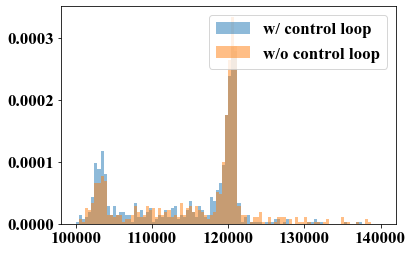

In [39]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))
comp_start_index = 300

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[comp_start_index:comp_end_index]),
    np.median(performance[comp_start_index:comp_end_index]),
    np.percentile(performance[comp_start_index:comp_end_index], 90),
    np.percentile(performance[comp_start_index:comp_end_index], 95),
    np.percentile(performance[comp_start_index:comp_end_index], 99),
    np.percentile(performance[comp_start_index:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[comp_start_index:comp_end_index]),
    np.median(u_performance[comp_start_index:comp_end_index]),
    np.percentile(u_performance[comp_start_index:comp_end_index], 90),
    np.percentile(u_performance[comp_start_index:comp_end_index], 95),
    np.percentile(u_performance[comp_start_index:comp_end_index], 99),
    np.percentile(u_performance[comp_start_index:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[comp_start_index:comp_end_index]) - np.mean(u_performance[comp_start_index:comp_end_index])) 
    / np.mean(u_performance[comp_start_index:comp_end_index]) * 100 * -1
))

_ = plt.hist(performance[comp_start_index:comp_end_index], density=True, bins=100, range=(100000, 140000), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[comp_start_index:comp_end_index], density=True, bins=100, range=(100000, 140000), label="w/o control loop", alpha=0.5)
plt.legend()

In [139]:
##################################
# Subsampling & Smooth
##################################

sub_sample = 5
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
recovery_time = recovery_time[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]

In [140]:
##################################
# Plot Perf & CGroup Limit
##################################
    
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (minutes)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("MIOPS", color='black', fontweight="bold", fontname="Times New Roman")
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 0.4)

# plt.plot(u_time * 60 - 5, u_performance / 1000000, color='C0', alpha=0.5, ls='--')
plt.plot(time * 60 - 5, performance / 1000000, color='black', alpha=0.5, linewidth=3)

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C0', fontweight="bold", fontname="Times New Roman")
ax2.tick_params(axis='y', labelcolor='C0')
plt.plot(time * 60 - 5, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=3)
plt.plot(time * 60 - 5, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=3)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, time[-1] * 60 - 5)

plt.plot([0], [0] , color='black', label='Throughput', alpha=0.5, linewidth=3)
# plt.plot([0], [0] , color='C0', alpha=0.5, ls='--', label='Throughput w/o Harvesting')

plt.legend(loc='upper right')

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("with-tswap.pdf", format="pdf", bbox_inches='tight', pad_inches=0)


In [141]:
plt.rcParams.update({'font.size': 25})

##################################
# Load Logging with Control Loop
##################################

with open("../data/memtier_without_silo/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 14), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
recovery_time = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
outlier_prob = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    recovery_time[item_index] = int(item.groups()[3])
    performance[item_index] = float(item.groups()[4])
    promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[7]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[9]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[10]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[11])
    outlier_prob[item_index] = float(item.groups()[12])
    ks_p_value[item_index] = float(item.groups()[13])

time = time / 3600
end_index = 1000
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
recovery_time = recovery_time[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
outlier_prob = outlier_prob[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


##################################
# Load Logging without Control Loop
##################################

with open("../data/memtier_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance)
end_index = 1000
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]


Average Harvest Size: 0.00 GB (0.11%)
End Harvest Size: 0.00 GB (0.05%)
comparison end index: 1000
Performance w/ Control Loop:
	mean: 104605.94
	median: 114222.5
	90th: 120921.09999999999
	95th: 121143.25
	99th: 130237.56
	99.99th: 138151.51809999984
Performance w/o Control Loop:
	mean: 115559.07142857143
	median: 119665.5
	90th: 121157.7
	95th: 125525.19999999998
	99th: 134827.69
	99.99th: 138433.07419999997
Performance Drop (avg): 9.48%


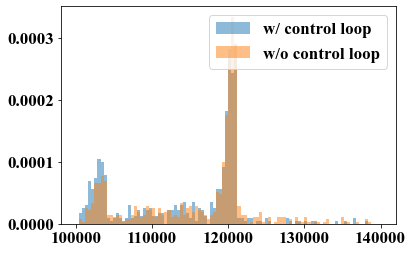

In [34]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))
comp_start_index = 300

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[comp_start_index:comp_end_index]),
    np.median(performance[comp_start_index:comp_end_index]),
    np.percentile(performance[comp_start_index:comp_end_index], 90),
    np.percentile(performance[comp_start_index:comp_end_index], 95),
    np.percentile(performance[comp_start_index:comp_end_index], 99),
    np.percentile(performance[comp_start_index:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[comp_start_index:comp_end_index]),
    np.median(u_performance[comp_start_index:comp_end_index]),
    np.percentile(u_performance[comp_start_index:comp_end_index], 90),
    np.percentile(u_performance[comp_start_index:comp_end_index], 95),
    np.percentile(u_performance[comp_start_index:comp_end_index], 99),
    np.percentile(u_performance[comp_start_index:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[comp_start_index:comp_end_index]) - np.mean(u_performance[comp_start_index:comp_end_index])) 
    / np.mean(u_performance[comp_start_index:comp_end_index]) * 100 * -1
))

_ = plt.hist(performance[comp_start_index:comp_end_index], density=True, bins=100, range=(100000, 140000), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[comp_start_index:comp_end_index], density=True, bins=100, range=(100000, 140000), label="w/o control loop", alpha=0.5)
plt.legend()

In [142]:
##################################
# Subsampling & Smooth
##################################

sub_sample = 5
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
recovery_time = recovery_time[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]

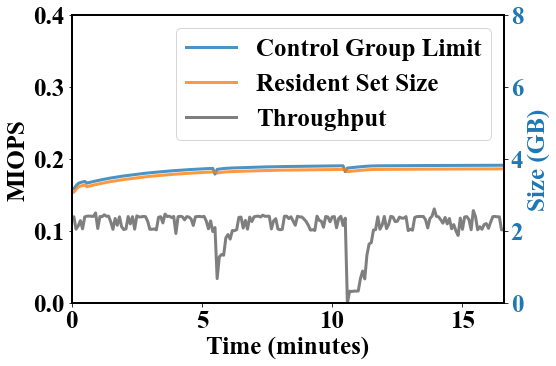

In [143]:
##################################
# Plot Perf & CGroup Limit
##################################
    
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (minutes)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("MIOPS", color='black', fontweight="bold", fontname="Times New Roman")
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 0.4)

# plt.plot(u_time * 60 - 5, u_performance / 1000000, color='C0', alpha=0.5, ls='--')
plt.plot(time * 60 - 5, performance / 1000000, color='black', linewidth=3, alpha=0.5)

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C0', fontweight="bold", fontname="Times New Roman")
ax2.tick_params(axis='y', labelcolor='C0')
plt.plot(time * 60 - 5, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=3)
plt.plot(time * 60 - 5, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=3)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, time[-1] * 60 - 5)

plt.plot([0], [0] , color='black', label='Throughput', alpha=0.5, linewidth=3)
# plt.plot([0], [0] , color='C0', alpha=0.5, ls='--', label='Throughput w/o Harvesting')

plt.legend(loc='upper right')

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("without-tswap.pdf", format="pdf", bbox_inches='tight', pad_inches=0)


## Shift Zipfian

```yaml
machine:
    type: "m5n.large"
    num_cpu_cores: 2
    memory_size: "8 GB"
workload:
    name: "zipfian_th + zipfian_bh"
    zipfian_constant: 0.7
    warm_up: "zipfian_th insert"
    operationcount_th: 100000000
    operationcount_bh: 100000000
    recordcount: 1000000
    threadcount: 2
swap_device: "disk"
prefetch_size: "64 MB"
```

In [7]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/shift_zipfian/logging_disk_ssd.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance, window_size=60) - 600
end_index = 7800
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [8]:
np.count_nonzero(performance > 100)

169

In [9]:
np.mean(performance)

82.77032852564102

In [10]:
##################################
# Subsampling & Smooth
##################################

performance = avg_smooth(performance, width=100)

sub_sample = 30
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

In [11]:
ssd_disk_perf = performance
ssd_disk_time = time

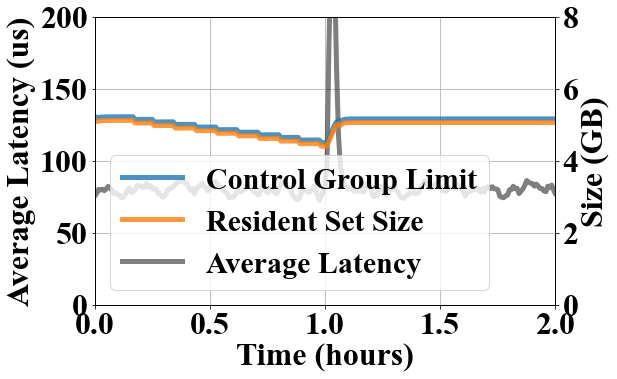

In [12]:
plt.rcParams.update({'font.size': 32})

fig, ax1 = plt.subplots(figsize=(6.4, 4))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, performance, color='black', linewidth=5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 200)
ax1.set_xlim(0, 2)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=5)
ax2.tick_params(axis='y')
plt.plot(time - 600 / 3600, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=5)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 2)

plt.plot([0], [0] , color='black', label='Average Latency', alpha=0.5, linewidth=5)

plt.legend(loc='lower left', fontsize=30)

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
# plt.savefig("with-disk.pdf", format="pdf", bbox_inches='tight', pad_inches=0)

In [17]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/shift_zipfian/logging_disk_hdd.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance, window_size=60) - 600
end_index = 7800
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [18]:
np.count_nonzero(performance > 100)

818

In [19]:
np.mean(performance)

161.54455661538464

In [20]:
##################################
# Subsampling & Smooth
##################################

performance = avg_smooth(performance, width=100)

sub_sample = 30
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

In [21]:
hdd_disk_perf = performance
hdd_disk_time = time

In [22]:
plt.rcParams.update({'font.size': 32})

fig, ax1 = plt.subplots(figsize=(6.4, 4))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, performance, color='black', linewidth=5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 200)
ax1.set_xlim(0, 2)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=5)
ax2.tick_params(axis='y')
plt.plot(time - 600 / 3600, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=5)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 2)

plt.plot([0], [0] , color='black', label='Average Latency', alpha=0.5, linewidth=5)

plt.legend(loc='lower left', fontsize=30)

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
# plt.savefig("with-disk.pdf", format="pdf", bbox_inches='tight', pad_inches=0)

In [23]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/shift_zipfian/logging_zram.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance, window_size=60) - 600
end_index = 7800
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [24]:
np.count_nonzero(performance > 100)

41

In [25]:
np.mean(performance)

80.20996488461536

In [26]:
np.max(performance)

302.202

In [27]:
##################################
# Subsampling & Smooth
##################################

performance = avg_smooth(performance, width=100)

sub_sample = 30
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

In [28]:
zram_perf = performance
zram_time = time

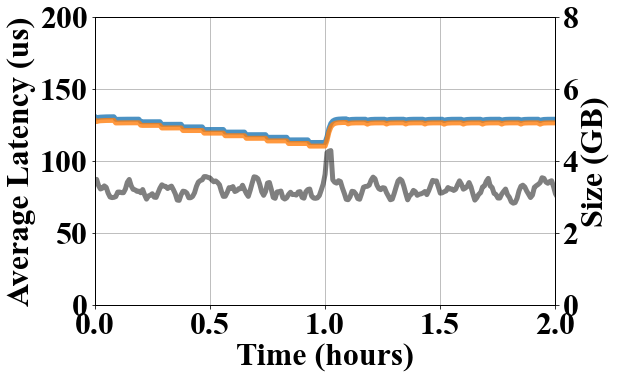

In [29]:
plt.rcParams.update({'font.size': 32})

fig, ax1 = plt.subplots(figsize=(6.4, 4))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, performance, color='black', linewidth=5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 200)
ax1.set_xlim(0, 2)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=5)
ax2.tick_params(axis='y')
plt.plot(time - 600 / 3600, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=5)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 2)

plt.plot([0], [0] , color='C0', label='Average Latency')

# plt.legend(loc='upper left')

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("with-zram.pdf", format="pdf", bbox_inches='tight', pad_inches=0)

In [44]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/shift_zipfian/logging_prefetch_ssd.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance, window_size=60) - 600
end_index = 7800
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [45]:
np.count_nonzero(performance > 100)

131

In [46]:
np.mean(performance)

81.79051620512821

In [47]:
np.max(performance)

351.95

In [48]:
##################################
# Subsampling & Smooth
##################################

performance = avg_smooth(performance, width=100)

sub_sample = 30
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

In [49]:
ssd_prefetch_perf = performance
ssd_prefetch_time = time

In [37]:
plt.rcParams.update({'font.size': 32})

fig, ax1 = plt.subplots(figsize=(6.4, 4))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, performance, color='black', linewidth=5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 200)
ax1.set_xlim(0, 2)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=5)
ax2.tick_params(axis='y')
plt.plot(time - 600 / 3600, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=5)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 2)

plt.plot([0], [0] , color='C0', label='Average Latency')

# plt.legend(loc='upper left')

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("with-prefetch.pdf", format="pdf", bbox_inches='tight', pad_inches=0)

In [95]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/shift_zipfian/logging_prefetch_hdd.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance, window_size=60) - 600
end_index = 7800
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [96]:
np.count_nonzero(performance > 100)

46

In [89]:
np.mean(performance)

83.82390785897435

In [90]:
##################################
# Subsampling & Smooth
##################################

performance = avg_smooth(performance, width=100)

sub_sample = 30
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

In [91]:
hdd_prefetch_perf = performance
hdd_prefetch_time = time

In [92]:
plt.rcParams.update({'font.size': 32})

fig, ax1 = plt.subplots(figsize=(6.4, 4))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, performance, color='black', linewidth=5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 200)
ax1.set_xlim(0, 2)
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")
plt.plot(time - 600 / 3600, cgroup_limit, color='C0', alpha=0.8, label='Control Group Limit', linewidth=5)
ax2.tick_params(axis='y')
plt.plot(time - 600 / 3600, cgroup_rss, color='C1', alpha=0.8, label='Resident Set Size', linewidth=5)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 2)

plt.plot([0], [0] , color='C0', label='Average Latency')

# plt.legend(loc='upper left')

fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("with-prefetch.pdf", format="pdf", bbox_inches='tight', pad_inches=0)

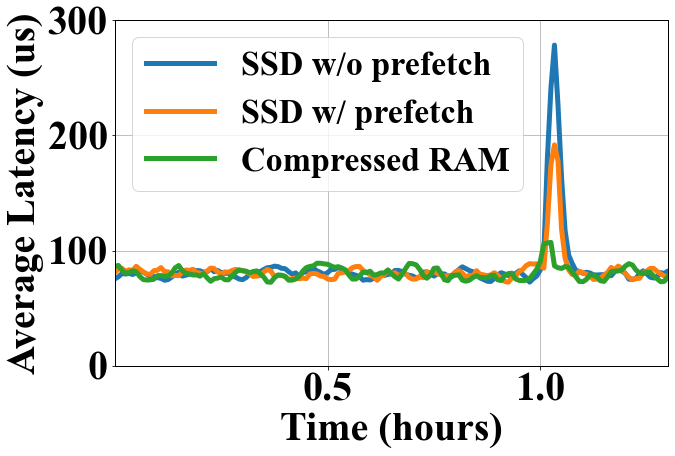

In [59]:
plt.rcParams.update({'font.size': 40})

fig = plt.figure(figsize=(6.4 * 1.2, 4.8 * 1.0))

plt.plot(ssd_disk_time - 600 / 3600, ssd_disk_perf, linewidth=5, label="SSD w/o prefetch")
plt.plot(ssd_prefetch_time - 600 / 3600, ssd_prefetch_perf, linewidth=5, label="SSD w/ prefetch")
# plt.plot(hdd_disk_time - 600 / 3600, hdd_disk_perf, linewidth=5, label="HDD w/o prefetch")
# plt.plot(hdd_prefetch_time - 600 / 3600, hdd_prefetch_perf, linewidth=5, label="HDD w/ prefetch")
plt.plot(zram_time - 600 / 3600, zram_perf, linewidth=5, label="Compressed RAM")

# plt.text(1.27, 130, "peak=217", color="C0")
# plt.text(0.5, 130, "peak=357", color="C1")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.ylim(0, 300)
plt.xlim(0, 1.3)
plt.xticks([0.5, 1])
plt.grid()

plt.legend(loc="upper left", fontsize=34)
fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("bursty-zipfian-ssd.pdf", format="pdf", bbox_inches='tight', pad_inches=0.1)

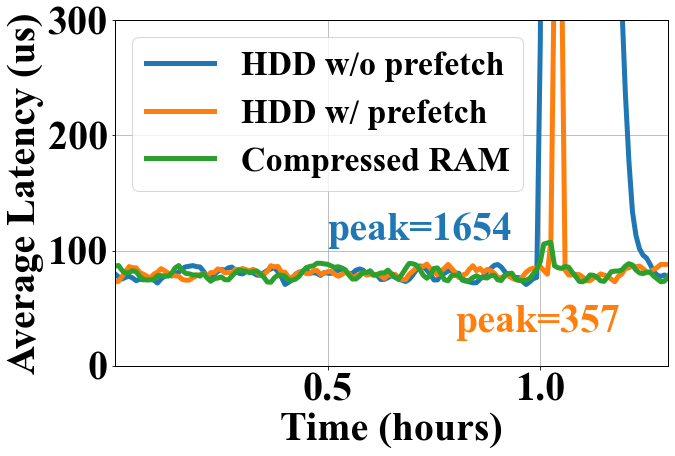

In [83]:
plt.rcParams.update({'font.size': 40})

fig = plt.figure(figsize=(6.4 * 1.2, 4.8 * 1.0))

# plt.plot(ssd_disk_time - 600 / 3600, ssd_disk_perf, linewidth=5, label="SSD w/o prefetch")
# plt.plot(ssd_prefetch_time - 600 / 3600, ssd_prefetch_perf, linewidth=5, label="SSD w/ prefetch")
plt.plot(hdd_disk_time - 600 / 3600, hdd_disk_perf, linewidth=5, label="HDD w/o prefetch")
plt.plot(hdd_prefetch_time - 600 / 3600, hdd_prefetch_perf, linewidth=5, label="HDD w/ prefetch")
plt.plot(zram_time - 600 / 3600, zram_perf, linewidth=5, label="Compressed RAM")

plt.text(0.5, 110, "peak=1654", color="C0")
plt.text(0.8, 30, "peak=357", color="C1")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel("Average Latency (us)", color='black', fontweight="bold", fontname="Times New Roman")
plt.ylim(0, 300)
plt.xlim(0, 1.3)
plt.xticks([0.5, 1])
plt.grid()

plt.legend(loc="upper left", fontsize=34)
fig.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("bursty-zipfian-hdd.pdf", format="pdf", bbox_inches='tight', pad_inches=0.1)

In [60]:
np.max(hdd_prefetch_perf)

356.89774600000004

In [62]:
np.max(hdd_disk_perf)

1654.4181700000001

## Memcached

```yaml
machine:
    type: "m5n.2xlarge"
    num_cpu_cores: 8
    memory_size: "32 GB"
memcached:
    num_threads: 8
    max_size: "28 GB"
workload:
    name: "memcachier"
    warm_up: "warm up workload"
    acceleration: 1
    operationcount: 676914873
```

In [18]:
matplotlib.rcParams['axes.linewidth'] = 4

In [19]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/memcached/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance)
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


##################################
# Load Logging without Control Loop
##################################

with open("../data/memcached_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance)
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]

Average Harvest Size: 4.10 GB (14.56%)
End Harvest Size: 5.19 GB (18.44%)
comparison end index: 131461
Performance w/ Control Loop:
	mean: 828.8986687762911
	median: 799.484
	90th: 1022.1
	95th: 1093.89
	99th: 1226.2779999999998
	99.99th: 4522.271399998701
Performance w/o Control Loop:
	mean: 820.2602145427162
	median: 794.332
	90th: 1007.77
	95th: 1076.57
	99th: 1190.156
	99.99th: 1463.0933799999723
Performance Drop (avg): 1.05%


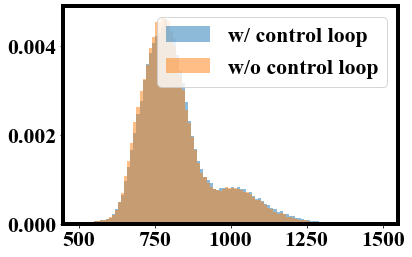

In [20]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[:comp_end_index]),
    np.median(performance[:comp_end_index]),
    np.percentile(performance[:comp_end_index], 90),
    np.percentile(performance[:comp_end_index], 95),
    np.percentile(performance[:comp_end_index], 99),
    np.percentile(performance[:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[:comp_end_index]),
    np.median(u_performance[:comp_end_index]),
    np.percentile(u_performance[:comp_end_index], 90),
    np.percentile(u_performance[:comp_end_index], 95),
    np.percentile(u_performance[:comp_end_index], 99),
    np.percentile(u_performance[:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[:comp_end_index]) - np.mean(u_performance[:comp_end_index])) 
    / np.mean(u_performance[:comp_end_index]) * 100
))

_ = plt.hist(performance[:comp_end_index], density=True, bins=100, range=(500, 1500), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[:comp_end_index], density=True, bins=100, range=(500, 1500), label="w/o control loop", alpha=0.5)
plt.legend()


In [21]:
32 - cgroup_rss[0]

3.8704566955566406

In [22]:
##################################
# Subsampling
##################################

sub_sample = 100
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

u_time = u_time[::sub_sample]
u_performance = u_performance[::sub_sample]
u_cgroup_rss = u_cgroup_rss[::sub_sample]

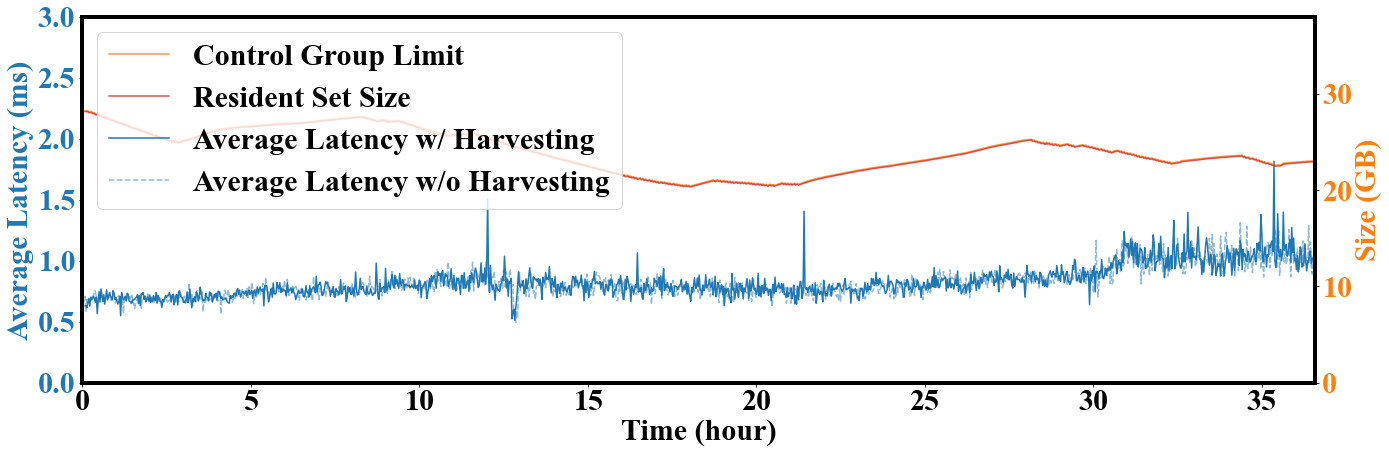

In [11]:
##################################
# Plot Perf & CGroup Limit
##################################

plt.rcParams.update({'font.size': 30})
    
fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.set_xlabel('Time (hour)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (ms)", color='C0', fontweight="bold", fontname="Times New Roman")
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_ylim(0, 3)

plt.plot(u_time, u_performance / 1000, color='C0', alpha=0.5, ls='--')
plt.plot(time, performance / 1000, color='C0')

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C1', fontweight="bold", fontname="Times New Roman")
ax2.tick_params(axis='y', labelcolor='C1')
plt.plot(time, cgroup_limit, color='C1', alpha=0.8, label='Control Group Limit')
plt.plot(time, cgroup_rss, color='C3', alpha=0.8, label='Resident Set Size')
ax2.set_ylim(0, 38)
ax2.set_xlim(0, time[-1])

plt.plot([0], [0] , color='C0', label='Average Latency w/ Harvesting')
plt.plot([0], [0] , color='C0', alpha=0.5, ls='--', label='Average Latency w/o Harvesting')

plt.legend(loc='upper left')

fig.tight_layout()
plt.savefig("eval-memcachier-memcached.pdf", format="pdf")

In [36]:
##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 100})

plt.figure(figsize=(20, 14))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=8)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=8)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Harvested Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested Idle')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='Resident Set Size')

plt.ylim(0, 32)
plt.xlim(time[0], time[-1])

plt.legend(loc="lower right")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("eval-memcachier-memcached-mc-s.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)

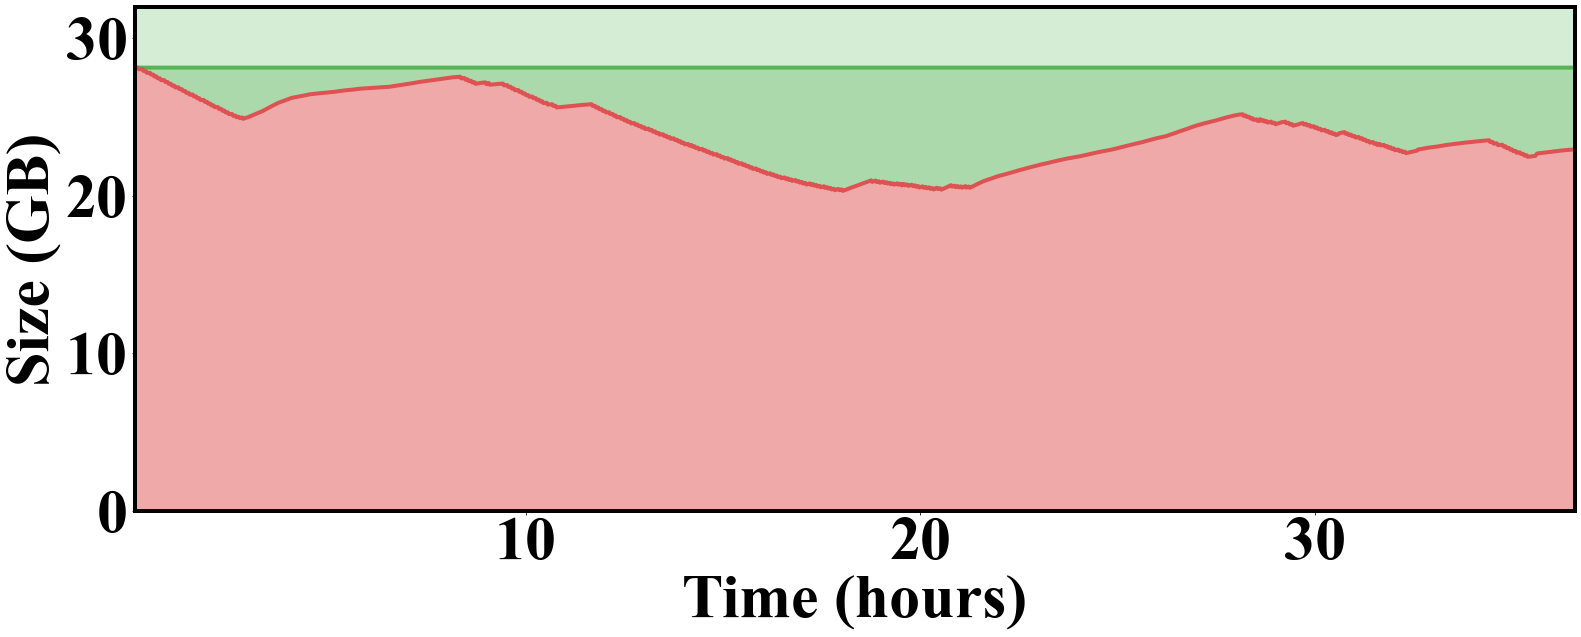

In [37]:
##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Harvested Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested Idle')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='Resident Set Size')

plt.ylim(0, 32)
plt.xlim(time[0], time[-1])

# plt.legend(loc="lower right")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("eval-memcachier-memcached-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)

## Redis

```yaml
machine:
    type: "m5n.large"
    num_cpu_cores: 2
    memory_size: "8 GB"
workload:
    name: "zipfian"
    zipfian_constant: 0.7
    warm_up: "zipfian insert"
    operationcount: 700000000
    recordcount: 1000000
    threadcount: 2
```

In [23]:
plt.rcParams.update({'font.size': 16})

##################################
# Load Logging with Control Loop
##################################

with open("../data/zipfian/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance) - 600
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


##################################
# Load Logging without Control Loop
##################################

with open("../data/zipfian_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance)
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]

Average Harvest Size: 0.89 GB (17.41%)
End Harvest Size: 1.02 GB (19.76%)
comparison end index: 27978
Performance w/ Control Loop:
	mean: 78.03983241832869
	median: 73.6532
	90th: 88.22808
	95th: 89.3714
	99th: 91.785921
	99.99th: 138.48241959999143
Performance w/o Control Loop:
	mean: 79.17528878404461
	median: 76.89644999999999
	90th: 88.14572
	95th: 89.13237500000001
	99th: 91.300381
	99.99th: 129.1272942999999
Performance Drop (avg): -1.43%


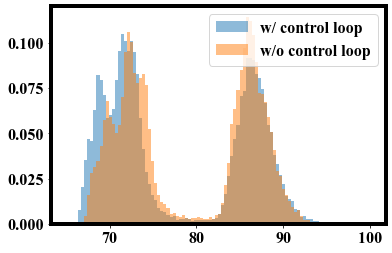

In [24]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[:comp_end_index]),
    np.median(performance[:comp_end_index]),
    np.percentile(performance[:comp_end_index], 90),
    np.percentile(performance[:comp_end_index], 95),
    np.percentile(performance[:comp_end_index], 99),
    np.percentile(performance[:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[:comp_end_index]),
    np.median(u_performance[:comp_end_index]),
    np.percentile(u_performance[:comp_end_index], 90),
    np.percentile(u_performance[:comp_end_index], 95),
    np.percentile(u_performance[:comp_end_index], 99),
    np.percentile(u_performance[:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[:comp_end_index]) - np.mean(u_performance[:comp_end_index])) 
    / np.mean(u_performance[:comp_end_index]) * 100
))

_ = plt.hist(performance[:comp_end_index], density=True, bins=100, range=(65, 100), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[:comp_end_index], density=True, bins=100, range=(65, 100), label="w/o control loop", alpha=0.5)
plt.legend()

In [25]:
8 - cgroup_rss[0]

2.860443115234375

In [26]:
##################################
# Subsampling
##################################

sub_sample = 50
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

u_time = u_time[::sub_sample]
u_performance = u_performance[::sub_sample]
u_cgroup_rss = u_cgroup_rss[::sub_sample]

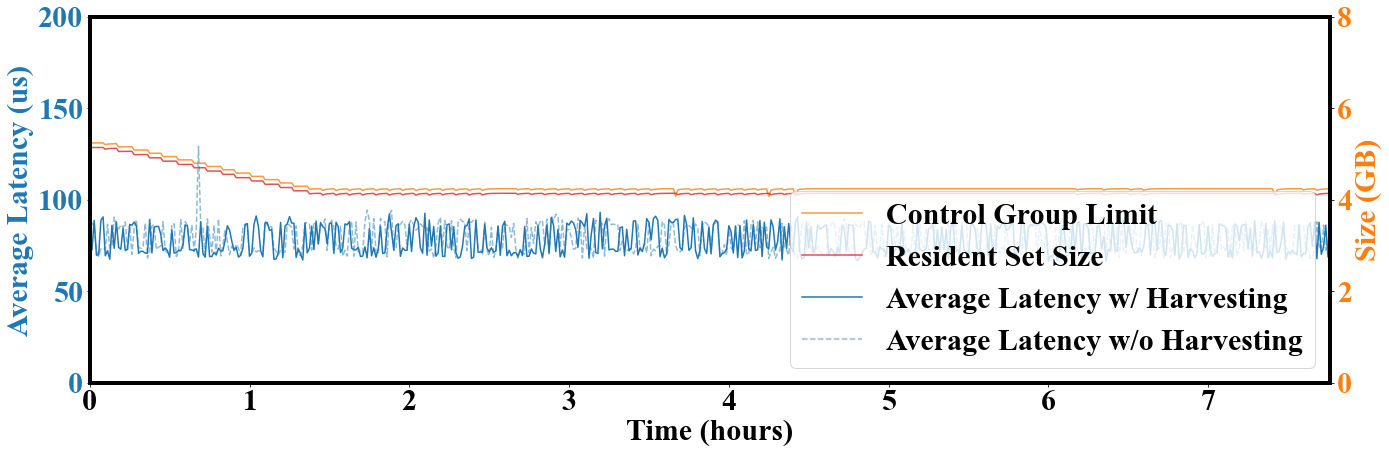

In [16]:
##################################
# Plot Perf & CGroup Limit
##################################

plt.rcParams.update({'font.size': 30})

fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='C0', fontweight="bold", fontname="Times New Roman")
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_ylim(0, 200)

plt.plot(u_time - 300 / 3600, u_performance, color='C0', alpha=0.5, ls='--')
plt.plot(time - 300 / 3600, performance, color='C0')

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C1', fontweight="bold", fontname="Times New Roman")
ax2.tick_params(axis='y', labelcolor='C1')
plt.plot(time - 300 / 3600, cgroup_limit, color='C1', alpha=0.8, label='Control Group Limit')
plt.plot(time - 300 / 3600, cgroup_rss, color='C3', alpha=0.8, label='Resident Set Size')
ax2.set_ylim(0, 8)
ax2.set_xlim(0, time[-1] - 300 / 3600)

plt.plot([0], [0] , color='C0', label='Average Latency w/ Harvesting')
plt.plot([0], [0] , color='C0', alpha=0.5, ls='--', label='Average Latency w/o Harvesting')

plt.legend(loc='lower right')

fig.tight_layout()
plt.savefig("eval-redis.pdf", format="pdf")


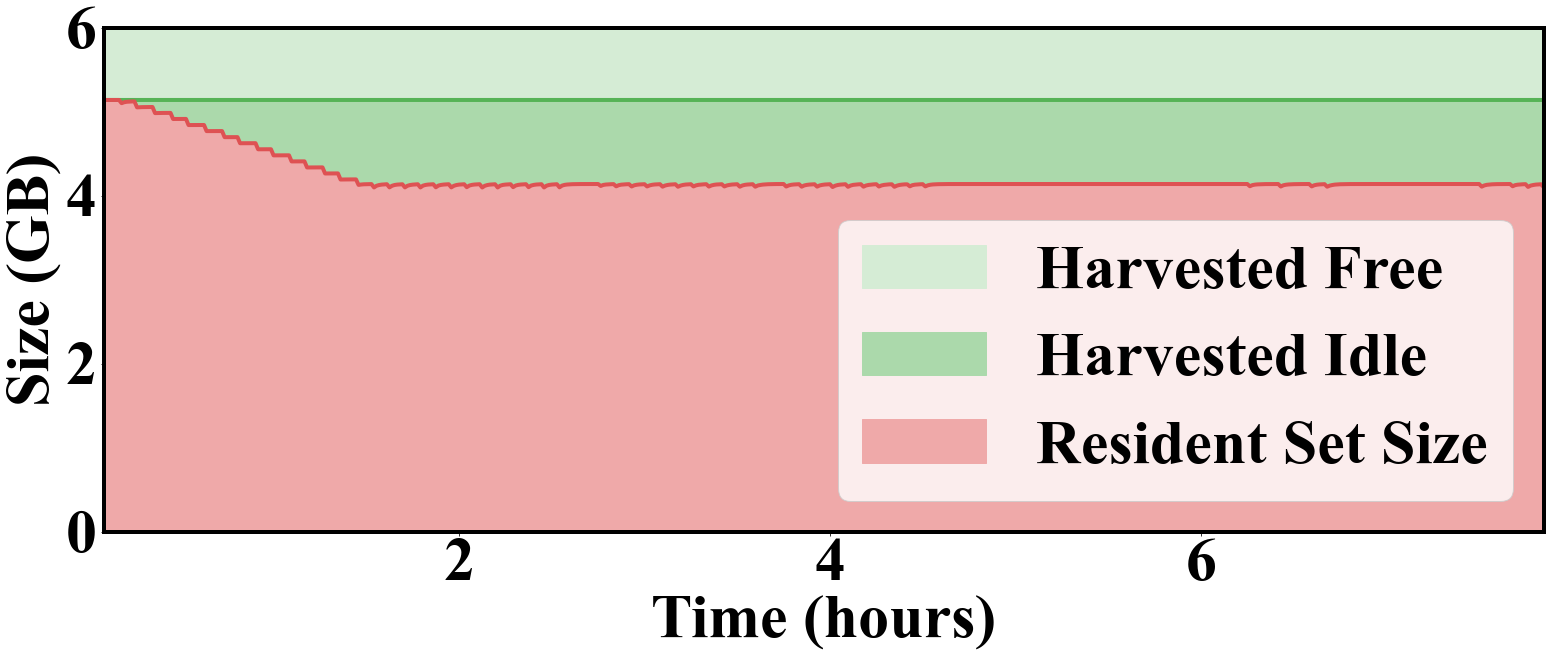

In [27]:
plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Harvested Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested Idle')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='Resident Set Size')

# plt.ylim(0, 8)
plt.ylim(0, 6)
plt.xlim(time[0], time[-1])

plt.legend(loc="lower right")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("eval-redis-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


## MySQL

```yaml
machine:
    type: "c6g.2xlarge"
    num_cpu_cores: 8
    memory_size: "16 GB"
mysql:
    num_threads: 8
    buffer_cache_size: "10 GB"
workload:
    name: "memcachier"
    warm_up: "memcachier warm up"
    acceleration: 0.02
    operationcount: 16922871
```

In [28]:
plt.rcParams.update({'font.size': 16})

##################################
# Load Logging with Control Loop
##################################

with open("../data/mysql/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 13), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99_ratio = np.ndarray(shape=(len(item_list),), dtype=np.float)
ks_p_value = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99_ratio[item_index] = float(item.groups()[11])
    ks_p_value[item_index] = float(item.groups()[12])

time = time / 3600
end_index = find_end(performance)
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99_ratio = p99_ratio[:end_index]
ks_p_value = ks_p_value[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


##################################
# Load Logging without Control Loop
##################################

with open("../data/mysql_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance)
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]

Average Harvest Size: 0.90 GB (7.04%)
End Harvest Size: 1.28 GB (10.02%)
comparison end index: 139185
Performance w/ Control Loop:
	mean: 1595.851930983942
	median: 1430.38
	90th: 2158.54
	95th: 2594.1479999999992
	99th: 4031.3420000000006
	99.99th: 15223.78527999968
Performance w/o Control Loop:
	mean: 1570.754074577002
	median: 1416.01
	90th: 2095.4580000000014
	95th: 2508.7379999999994
	99th: 3893.013600000003
	99.99th: 13410.100639998966
Performance Drop (avg): 1.60%


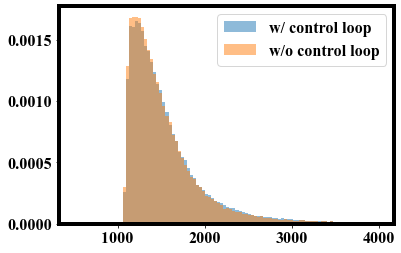

In [29]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[:comp_end_index]),
    np.median(performance[:comp_end_index]),
    np.percentile(performance[:comp_end_index], 90),
    np.percentile(performance[:comp_end_index], 95),
    np.percentile(performance[:comp_end_index], 99),
    np.percentile(performance[:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[:comp_end_index]),
    np.median(u_performance[:comp_end_index]),
    np.percentile(u_performance[:comp_end_index], 90),
    np.percentile(u_performance[:comp_end_index], 95),
    np.percentile(u_performance[:comp_end_index], 99),
    np.percentile(u_performance[:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[:comp_end_index]) - np.mean(u_performance[:comp_end_index])) 
    / np.mean(u_performance[:comp_end_index]) * 100
))

_ = plt.hist(performance[:comp_end_index], density=True, bins=100, range=(500, 4000), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[:comp_end_index], density=True, bins=100, range=(500, 4000), label="w/o control loop", alpha=0.5)
plt.legend()

In [30]:
16 - cgroup_rss[0]

3.2527618408203125

In [31]:
##################################
# Subsampling
##################################

sub_sample = 100
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99_ratio = p99_ratio[::sub_sample]
ks_p_value = ks_p_value[::sub_sample]

u_time = u_time[::sub_sample]
u_performance = u_performance[::sub_sample]
u_cgroup_rss = u_cgroup_rss[::sub_sample]

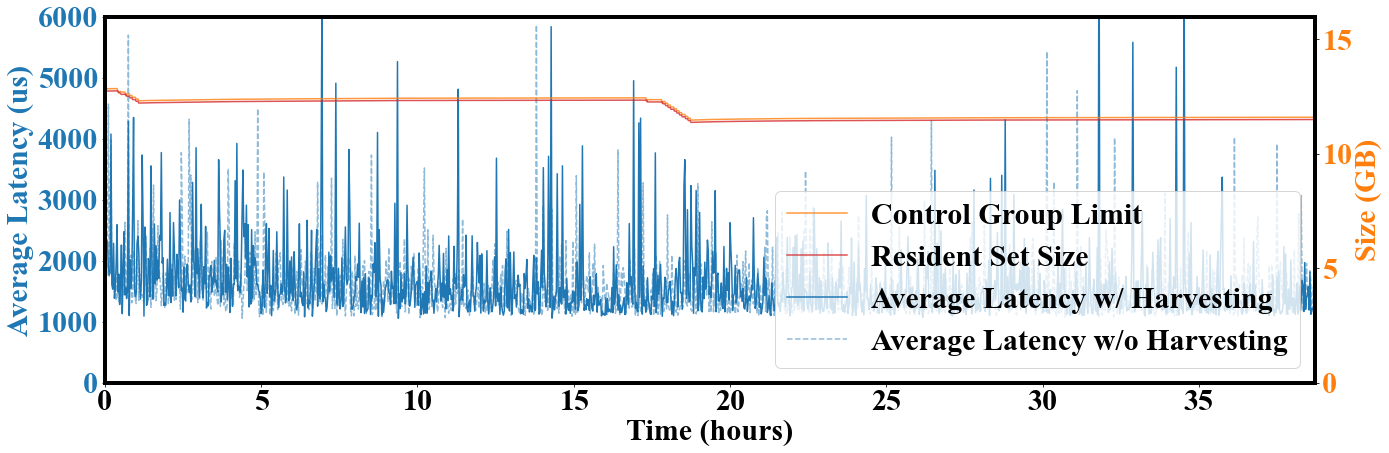

In [22]:
##################################
# Plot Perf & CGroup Limit
##################################

plt.rcParams.update({'font.size': 30})
    
fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.set_xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Average Latency (us)", color='C0', fontweight="bold", fontname="Times New Roman")
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_ylim(0, 6000)

plt.plot(u_time, u_performance, color='C0', alpha=0.5, ls='--')
plt.plot(time, performance, color='C0')

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C1', fontweight="bold", fontname="Times New Roman")
ax2.tick_params(axis='y', labelcolor='C1')
plt.plot(time, cgroup_limit, color='C1', alpha=0.8, label='Control Group Limit')
plt.plot(time, cgroup_rss, color='C3', alpha=0.8, label='Resident Set Size')
ax2.set_ylim(0, 16)
ax2.set_xlim(0, time[-1])

plt.plot([0], [0] , color='C0', label='Average Latency w/ Harvesting')
plt.plot([0], [0] , color='C0', alpha=0.5, ls='--', label='Average Latency w/o Harvesting')

plt.legend(loc='lower right')

fig.tight_layout()
plt.savefig("eval-mysql.pdf", format="pdf")


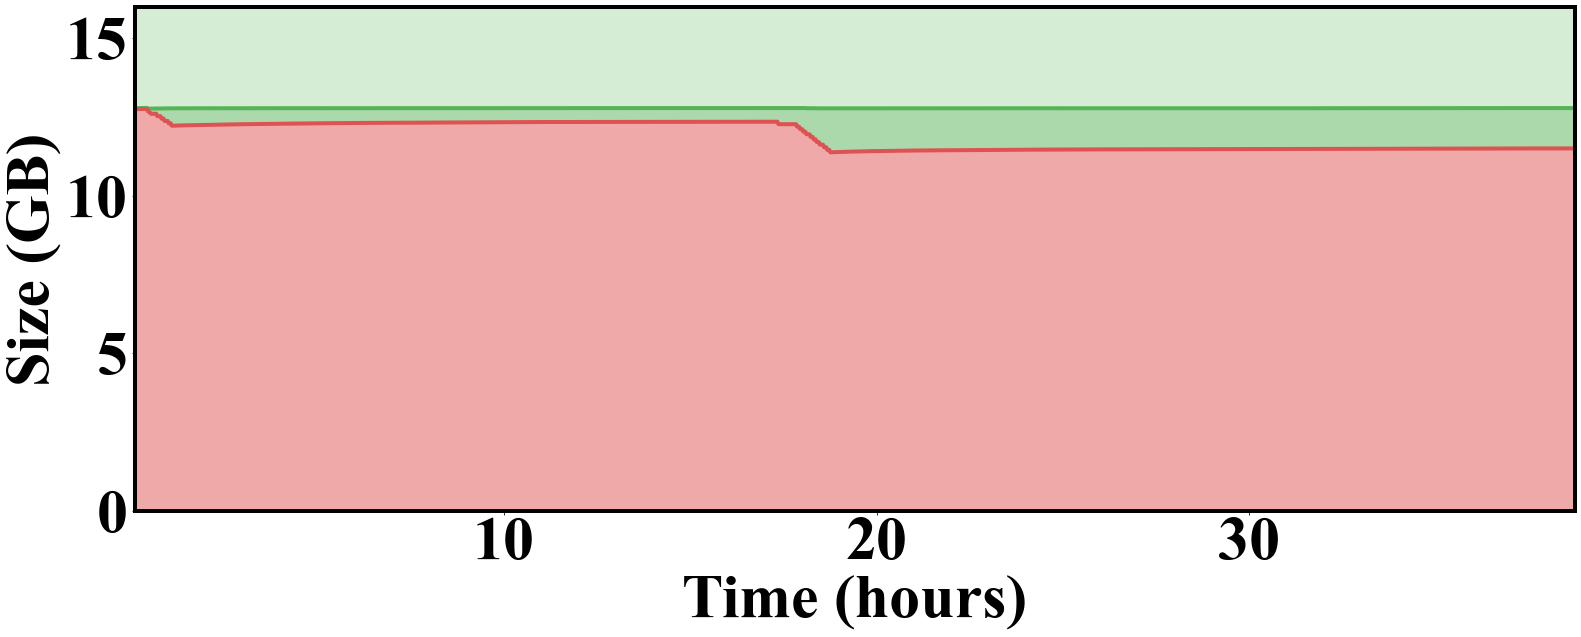

In [47]:
##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='RSS')

plt.ylim(0, 16)
plt.xlim(time[0], time[-1])

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.savefig("eval-mysql-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


## XGBoost

```yaml
machine:
    type: "m5n.2xlarge"
    num_cpu_cores: 8
    memory_size: "32 GB"
```

In [32]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/xgboost/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.ena]+)"] * 12), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99 = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99[item_index] = float(item.groups()[11])

time = time / 3600
end_index = 15000
while cgroup_swap[end_index] > 3:
    end_index += 1
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99 = p99[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


In [33]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

print("Performance Drop (avg): {:.2f}%".format(
    ((35579.31 - 35477.62) 
    / 35477.62) * 100
))

Average Harvest Size: 2.82 GB (17.08%)
End Harvest Size: 3.43 GB (20.49%)
Performance Drop (avg): 0.29%


In [34]:
32 - cgroup_rss[0]

15.522266387939453

In [35]:
##################################
# Subsampling
##################################

sub_sample = 10
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99 = p99[::sub_sample]

In [52]:

##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 100})

plt.figure(figsize=(20, 14))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=8)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=8)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Harvested Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested Idle')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='Resident Set Size')

plt.ylim(0, 32)
plt.xlim(time[0], time[-1])

# plt.legend(loc="upper right")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.xticks([2, 4, 6, 8])
plt.savefig("eval-xgboost-mc-s.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


In [36]:

##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Harvested Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested Idle')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='Resident Set Size')

# plt.ylim(0, 32)
plt.ylim(0, 20)
plt.xlim(time[0], time[-1])

# plt.legend(loc="upper right")

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.xticks([2, 4, 6, 8])
plt.savefig("eval-xgboost-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


## Streaming

```yaml
machine:
    type: "c6g.xlarge"
    num_cpu_cores: 4
    memory_size: "8 GB"
storm:
    test_time: 7200
    warm_up_time: 1800
```

In [37]:
plt.rcParams.update({'font.size': 16})

##################################
# Load Logging with Control Loop
##################################

with open("../data/storm/logging.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.ena]+)"] * 12), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99 = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99[item_index] = float(item.groups()[11])

time = time / 3600
end_index = find_end(cgroup_rss) - 180
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99 = p99[:end_index]

cgroup_limit[cgroup_limit < 0] = cgroup_rss[cgroup_limit < 0] + 0.1


with open("../data/storm/stat_log", "r") as fp:
    data = fp.read()
    
item_list = list(re.finditer("Average latency: ([0-9.]+) ms", data))
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    performance[item_index] = float(item.groups()[0])
performance = performance[:end_index]


##################################
# Load Logging without Control Loop
##################################

with open("../data/storm_baseline/log", "r") as fp:
    data = fp.read()
u_item_list = list(re.finditer(",".join(["([0-9-.e]+)"] * 3), data))
u_time = np.arange(len(u_item_list))
u_performance = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
u_cgroup_rss = np.ndarray(shape=(len(u_item_list),), dtype=np.float)
for item_index, item in enumerate(u_item_list):
    u_performance[item_index] = float(item.groups()[0])
    u_cgroup_rss[item_index] = int(item.groups()[1]) / (2 ** 30)

u_time = u_time / 3600
end_index = find_end(u_performance, window_size=60) - 60
u_time = u_time[:end_index]
u_performance = u_performance[:end_index]
u_cgroup_rss = u_cgroup_rss[:end_index]

In [38]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("End Harvest Size: {:.2f} GB ({:.2f}%)".format(
    (cgroup_swap - silo_memory_size)[-1],
    ((cgroup_swap - silo_memory_size)[-1] / (cgroup_rss + cgroup_swap)[-1]) * 100
))

comp_end_index = min(performance.shape[0], u_performance.shape[0])
print("comparison end index: {}".format(comp_end_index))

print("Performance w/ Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(performance[:comp_end_index]),
    np.median(performance[:comp_end_index]),
    np.percentile(performance[:comp_end_index], 90),
    np.percentile(performance[:comp_end_index], 95),
    np.percentile(performance[:comp_end_index], 99),
    np.percentile(performance[:comp_end_index], 99.99)
))

print("Performance w/o Control Loop:\n\tmean: {}\n\tmedian: {}\n\t90th: {}\n\t95th: {}\n\t99th: {}\n\t99.99th: {}".format(
    np.mean(u_performance[:comp_end_index]),
    np.median(u_performance[:comp_end_index]),
    np.percentile(u_performance[:comp_end_index], 90),
    np.percentile(u_performance[:comp_end_index], 95),
    np.percentile(u_performance[:comp_end_index], 99),
    np.percentile(u_performance[:comp_end_index], 99.99)
))

print("Performance Drop (avg): {:.2f}%".format(
    (np.mean(performance[:comp_end_index]) - np.mean(u_performance[:comp_end_index])) 
    / np.mean(u_performance[:comp_end_index]) * 100
))

_ = plt.hist(performance[:comp_end_index], density=True, bins=100, range=(6.5, 6.65), label="w/ control loop", alpha=0.5)
_ = plt.hist(u_performance[:comp_end_index], density=True, bins=100, range=(6.5, 6.65), label="w/o control loop", alpha=0.5)
plt.legend()

Average Harvest Size: 0.04 GB (1.42%)
End Harvest Size: 0.17 GB (5.63%)
comparison end index: 4867
Performance w/ Control Loop:
	mean: 6.573122046435176
	median: 6.571
	90th: 6.62
	95th: 6.632
	99th: 6.652
	99.99th: 6.661
Performance w/o Control Loop:
	mean: 6.580960756112595
	median: 6.579
	90th: 6.622
	95th: 6.633
	99th: 6.639000000000001
	99.99th: 6.645
Performance Drop (avg): -0.12%


In [39]:
8 - cgroup_rss[0]

3.7872848510742188

In [40]:
##################################
# Subsampling
##################################

sub_sample = 10
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99 = p99[::sub_sample]

In [41]:
##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='RSS')

# plt.ylim(0, 8)
plt.ylim(0, 5)
plt.xlim(time[0], time[-1])

# plt.legend(loc="lower right", fontsize=44)

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()
plt.xticks([0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(1, 1)
plt.savefig("eval-storm-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


## CloudSuite

```yaml
machine:
    type: "c6g.large"
    num_cpu_cores: 2
    memory_size: "4 GB"
```

In [42]:
##################################
# Load Logging with Control Loop
##################################

with open("../data/cloudsuite/eval_cloudsuite.csv", "r") as fp:
    data = fp.read()
item_list = list(re.finditer(",".join(["([0-9-.ena]+)"] * 12), data))
time = np.ndarray(shape=(len(item_list),), dtype=np.float)
state = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_limit = np.ndarray(shape=(len(item_list),), dtype=np.float)
performance = np.ndarray(shape=(len(item_list),), dtype=np.float)
promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
disk_promotion_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
invalidation_rate = np.ndarray(shape=(len(item_list),), dtype=np.float)
silo_memory_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_rss = np.ndarray(shape=(len(item_list),), dtype=np.float)
cgroup_swap = np.ndarray(shape=(len(item_list),), dtype=np.float)
baseline_size = np.ndarray(shape=(len(item_list),), dtype=np.float)
p99 = np.ndarray(shape=(len(item_list),), dtype=np.float)
for item_index, item in enumerate(item_list):
    time[item_index] = int(item.groups()[0])
    state[item_index] = int(item.groups()[1])
    cgroup_limit[item_index] = int(item.groups()[2]) / (2 ** 30)
    performance[item_index] = float(item.groups()[3])
    promotion_rate[item_index] = int(item.groups()[4]) / (2 ** 30)
    disk_promotion_rate[item_index] = int(item.groups()[5]) / (2 ** 30)
    invalidation_rate[item_index] = int(item.groups()[6]) / (2 ** 30)
    silo_memory_size[item_index] = int(item.groups()[7]) / (2 ** 30)
    cgroup_rss[item_index] = int(item.groups()[8]) / (2 ** 30)
    cgroup_swap[item_index] = int(item.groups()[9]) / (2 ** 30)
    baseline_size[item_index] = int(item.groups()[10])
    p99[item_index] = float(item.groups()[11])

time = time / 3600
end_index = find_end(cgroup_rss) - 180
time = time[:end_index]
state = state[:end_index]
cgroup_limit = cgroup_limit[:end_index]
performance = performance[:end_index]
promotion_rate = promotion_rate[:end_index]
disk_promotion_rate = disk_promotion_rate[:end_index]
invalidation_rate = invalidation_rate[:end_index]
silo_memory_size = silo_memory_size[:end_index]
cgroup_rss = cgroup_rss[:end_index]
cgroup_swap = cgroup_swap[:end_index]
baseline_size = baseline_size[:end_index]
p99 = p99[:end_index]

In [43]:
np.mean(4 - cgroup_rss)

3.5320576171940057

In [44]:
##################################
# Calculate Statistics
##################################

print("Average Harvest Size: {:.2f} GB ({:.2f}%)".format(
    np.mean((cgroup_swap - silo_memory_size)),
    np.mean((cgroup_swap - silo_memory_size) / (cgroup_rss + cgroup_swap)) * 100
))

print("Performance Drop (avg): {:.2f}%".format(
    ((14.366 - 14.442) / 14.366) * 100
))

Average Harvest Size: 0.09 GB (15.32%)
Performance Drop (avg): -0.53%


In [45]:
##################################
# Subsampling
##################################

sub_sample = 10
time = time[::sub_sample]
state = state[::sub_sample]
cgroup_limit = cgroup_limit[::sub_sample]
performance = performance[::sub_sample]
promotion_rate = promotion_rate[::sub_sample]
disk_promotion_rate = disk_promotion_rate[::sub_sample]
invalidation_rate = invalidation_rate[::sub_sample]
silo_memory_size = silo_memory_size[::sub_sample]
cgroup_rss = cgroup_rss[::sub_sample]
cgroup_swap = cgroup_swap[::sub_sample]
baseline_size = baseline_size[::sub_sample]
p99 = p99[::sub_sample]

In [42]:
##################################
# Plot Promo Rate & CGroup Limit
##################################

plt.rcParams.update({'font.size': 30})
    
fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.set_xlabel('Time (hour)', fontweight="bold", fontname="Times New Roman")
ax1.set_ylabel("Promotion Rate (MB/s)", color='C0', fontweight="bold", fontname="Times New Roman")
plt.plot(time, promotion_rate * (2 ** 10), color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_ylim(0, 300)

ax2 = ax1.twinx()
ax2.set_ylabel('Size (GB)', color='C1', fontweight="bold", fontname="Times New Roman")
plt.plot(time, cgroup_limit, color='C1', alpha=0.8, label='Control Group Limit')
ax2.tick_params(axis='y', labelcolor='C1')
plt.plot(time, cgroup_rss, color='C3', alpha=0.8, label='Resident Set Size')
ax2.set_ylim(0, 1.7)

plt.plot([0], [0] , color='C0', label='Promotion Rate')
plt.legend(loc="upper left")

plt.xlim(0, time[-1])

fig.tight_layout()
plt.savefig("eval-cloudsuite.pdf", format="pdf")

In [47]:
##################################
# Plot Memory Composition
##################################

plt.rcParams.update({'font.size': 62})

plt.figure(figsize=(20, 7))

plt.plot(time, cgroup_rss + cgroup_swap, color=[0.2 + 0.8 * c for c in colors.to_rgb("C2")], linewidth=4)
# plt.plot(time, cgroup_rss + silo_memory_size, color=[0.2 + 0.8 * c for c in colors.to_rgb("C0")], linewidth=4)
plt.plot(time, cgroup_rss, color=[0.2 + 0.8 * c for c in colors.to_rgb("C3")], linewidth=4)

plt.fill_between(time, cgroup_rss + cgroup_swap, np.ones(shape=time.shape) * 36000, 
                 color=[0.8 + 0.2 * c for c in colors.to_rgb("C2")], label='Free')
plt.fill_between(time, cgroup_rss, cgroup_rss + cgroup_swap, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C2")], label='Harvested')
# plt.fill_between(time, cgroup_rss, cgroup_rss + silo_memory_size, 
#                  color=[0.6 + 0.4 * c for c in colors.to_rgb("C0")], label='Silo')
plt.fill_between(time, 0, cgroup_rss, 
                 color=[0.6 + 0.4 * c for c in colors.to_rgb("C3")], label='RSS')

# plt.ylim(0, 4)
plt.ylim(0, 0.8)
plt.xlim(time[0], time[-1])

# plt.legend(loc="lower right", fontsize=44)

plt.xlabel('Time (hours)', fontweight="bold", fontname="Times New Roman")
plt.ylabel('Size (GB)', fontweight="bold", fontname="Times New Roman")

plt.tight_layout()
plt.xticks([0.2, 0.4, 0.6, 0.8, 1, 1.2])

plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(1, 1)
plt.savefig("eval-cloudsuite-mc.pdf", format="pdf", bbox_inches='tight', pad_inches=0.05)


### Sensitivity Analysis (Not Used)

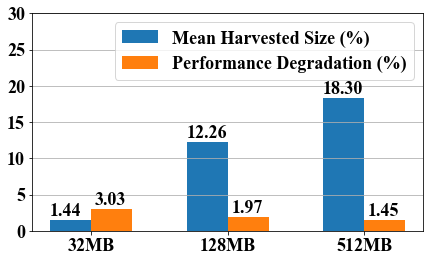

In [49]:
plt.rcParams.update({'font.size': 18})
N = 3
width = 0.3 

arr1 = [0.219518567,0.182968007,0.199310848,0.4568936,0.014470068,0.009035275]
arr2 = [0.215370458,0.122579181,0.12928119,0.470651258,0.019655255,0.015664098]
arr3 = [0.03430797,0.014393112,0.013634063,0.511523653,0.030309169,0.030592494]

val1_3 = arr1[1] * 100
val1_2 = arr2[1] * 100
val1_1 = arr3[1] * 100

val2_3 = arr1[4] * 100
val2_2 = arr2[4] * 100 
val2_1 = arr3[4] * 100 

labels = ['32MB', '128MB', '512MB']
x = np.arange(len(labels))

blue_bar = [val1_1, val1_2, val1_3]
orange_bar = [val2_1, val2_2, val2_3]


ind = np.arange(N)
plt.figure(figsize=(7,4))
for i,v in enumerate(blue_bar):
    plt.text(ind[i] - (width / 2), v + 0.6 , str("{:.2f}".format(v)))
    
for i,v in enumerate(orange_bar):
    plt.text(ind[i] + (width / 2) + 0.03, v + 0.6 , str("{:.2f}".format(v)))

plt.bar(ind, blue_bar , width, label='Mean Harvested Size (%)')
plt.bar(ind + width, orange_bar, width, label='Performance Degradation (%)')

plt.xticks(ind + width / 2, ('32MB', '128MB', '512MB'))

plt.legend(loc='best')
plt.ylim(0, 30.0)
plt.grid(axis='y')
plt.savefig('step-size.pdf', format='pdf')

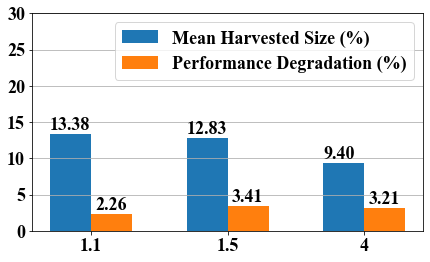

In [50]:
plt.rcParams.update({'font.size': 18})
N = 3

arr1 = [0.209338777,0.13384369,0.156903971,0.514020419,0.022647556,0.018261322]
arr2 = [0.204890397,0.12833444,0.142582761,0.529771657,0.034066447,0.032430835]
arr3 = [0.202169044,0.094005487,0.081286777,0.718357335,0.032074107,0.028943012]

val1_1 = arr1[1] * 100
val1_2 = arr2[1] * 100
val1_3 = arr3[1] * 100

val2_1 = arr1[4] * 100
val2_2 = arr2[4] * 100 
val2_3 = arr3[4] * 100 

labels = ['32MB', '128MB', '512MB']
x = np.arange(len(labels))

blue_bar = [val1_1, val1_2, val1_3]
orange_bar = [val2_1, val2_2, val2_3]

width = 0.3 
ind = np.arange(N)
plt.figure(figsize=(7,4))
for i,v in enumerate(blue_bar):
    plt.text(ind[i] - (width / 2), v + 0.6 , str("{:.2f}".format(v)))
    
for i,v in enumerate(orange_bar):
    plt.text(ind[i] + (width / 2) + 0.03, v + 0.6 , str("{:.2f}".format(v)))
      

plt.bar(ind, blue_bar , width, label='Mean Harvested Size (%)')
plt.bar(ind + width, orange_bar, width, label='Performance Degradation (%)')
plt.xticks(ind + width / 2, ('1.1', '1.5', '4'))

plt.legend(loc='best')
plt.ylim(0, 30.0)
plt.grid(axis='y')
plt.savefig('mi.pdf', format='pdf')

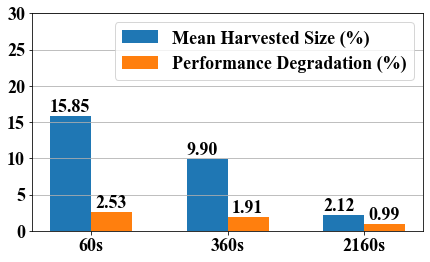

In [51]:
plt.rcParams.update({'font.size': 18})
N = 3

arr1 = [0.222732822,0.158473473,0.195209996,0.500759681,0.025283383,0.021172971]
arr2 = [0.196060954,0.099046787,0.097449724,0.513215314,0.019103571,0.016916561]
arr3 = [0.042844335,0.021233762,0.014256813,0.493880262,0.009882311,0.008744057]

val1_1 = arr1[1] * 100
val1_2 = arr2[1] * 100
val1_3 = arr3[1] * 100

val2_1 = arr1[4] * 100
val2_2 = arr2[4] * 100 
val2_3 = arr3[4] * 100 

labels = ['60s', '360s', '2160s']
x = np.arange(len(labels))

blue_bar = [val1_1, val1_2, val1_3]
orange_bar = [val2_1, val2_2, val2_3]


ind = np.arange(N)
plt.figure(figsize=(7,4))
width = 0.3
for i,v in enumerate(blue_bar):
    plt.text(ind[i] - (width / 2), v + 0.6 , str("{:.2f}".format(v)))
for i,v in enumerate(orange_bar):
    plt.text(ind[i] + (width / 2) + 0.03, v + 0.6 , str("{:.2f}".format(v)))
       
plt.bar(ind, blue_bar , width, label='Mean Harvested Size (%)')
plt.bar(ind + width, orange_bar, width, label='Performance Degradation (%)')

plt.xticks(ind + width / 2, labels)

plt.legend(loc='best')
plt.ylim(0, 30)
plt.grid(axis='y')
plt.savefig('cooling-period.pdf', format='pdf')